 I was able to decipher the text from my graph and found the following results:
 top 10 most popular political blogs: 
 1. freerepublican.com  
 2. georgewebusch.com
 3. roseoftheknights.com
 4. moorewatch.com
 5. americanwarmonger.blogspot.com
 6. pundtz.journalspace.com
 7. grupo-utopia.com
 8. www.dailykos.com
 9. www.politica.com
 10. www.salon.com
 10 least popular:
1. liberaleric.blogspot
2. natr.org
3. www.etalkingheads.com
4. rrhwtorixrythm.blogspot.com
5. www.50minutehour.net
6. strangedoctrines.blogspot.com
7. chickenfriedpolitics.com
8. digipoop.com
9. learbthetruthproject.blogspot.com
10. littlemissatila.blogspot.com
                                              tsrightdominion.blogspot.com  \
tsrightdominion.blogspot.com                                           0.0   
rightrainbow.com                                                       0.0   
gregpalast.com                                                         0.0   
younglibs.com                                      

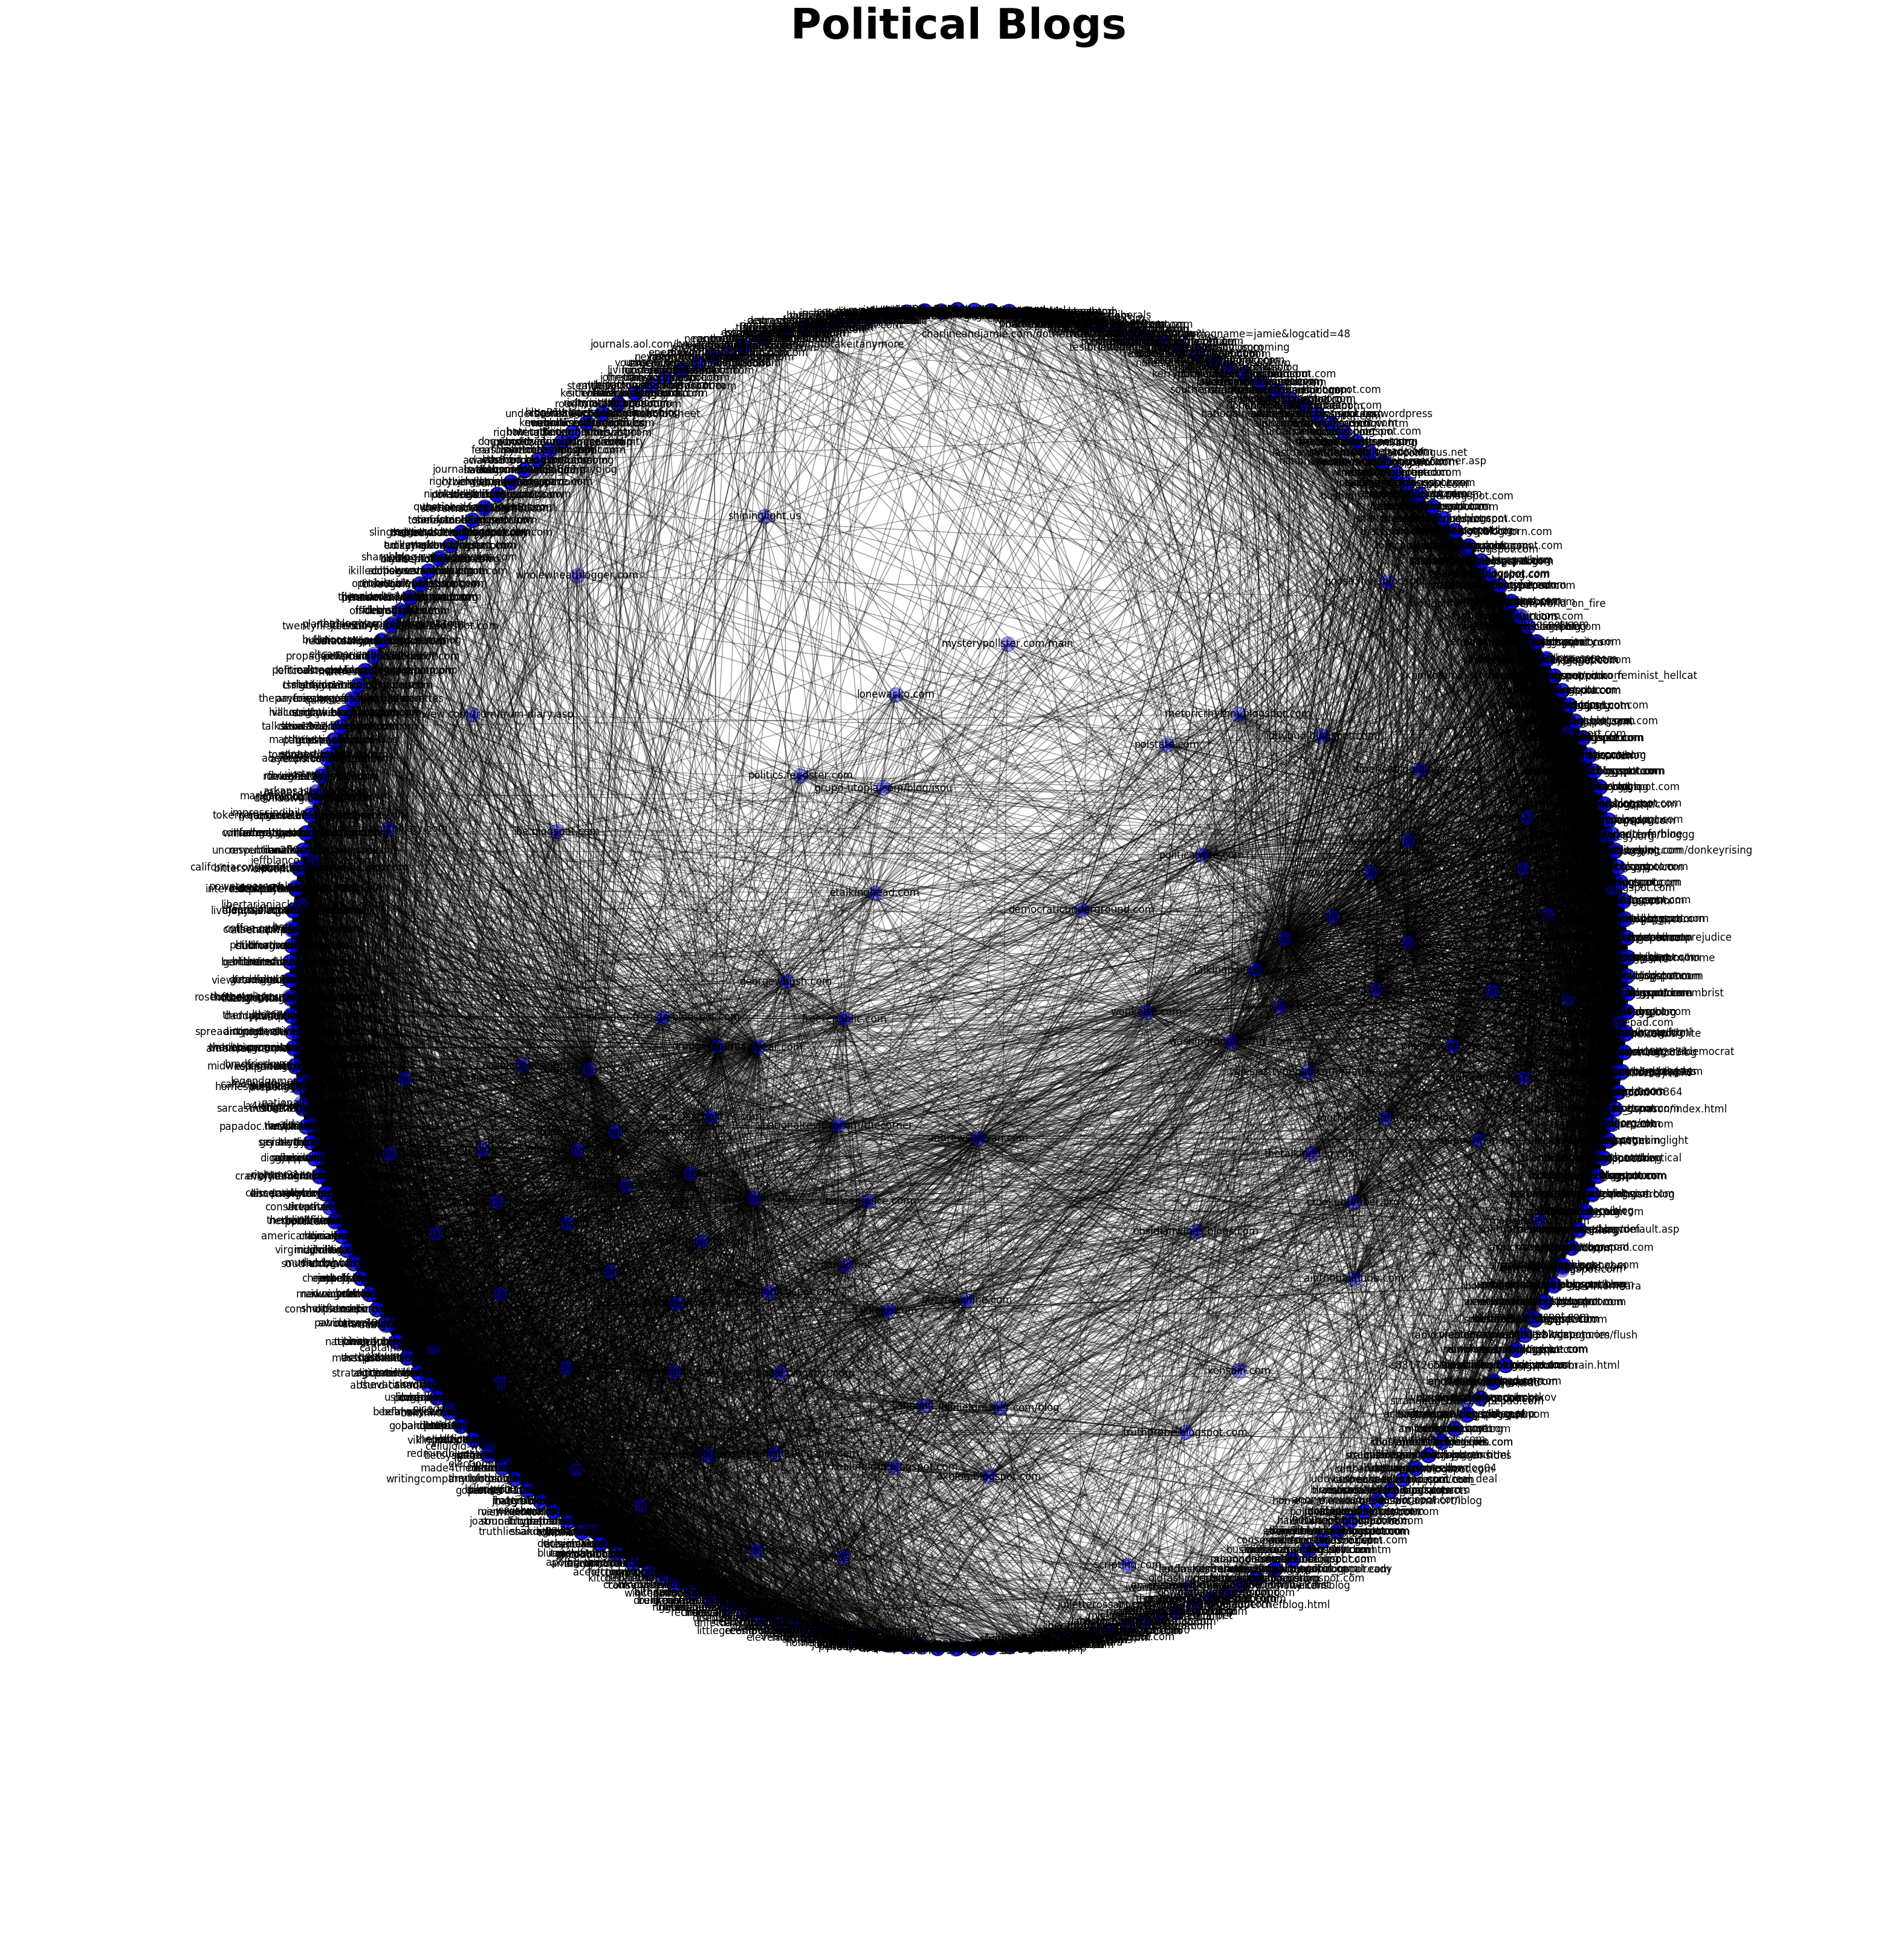

In [66]:
#Chris DiBello CSC570R-Network Analysis Homework.
#I found some functions and code to use at https://github.com/rkdarst/pcd
#http://networkx.readthedocs.io/en/stable/_modules/networkx/convert_matrix.html
#This converts the networkx to a dataframe allowing me to do some data analysis.
import warnings
import itertools
import networkx as nx
from networkx.convert import _prep_create_using
from networkx.utils import not_implemented_for
__author__ = """\n""".join(['Aric Hagberg <aric.hagberg@gmail.com>',
                           'Pieter Swart (swart@lanl.gov)',
                           'Dan Schult(dschult@colgate.edu)'])
__all__ = ['from_numpy_matrix', 'to_numpy_matrix',
           'from_pandas_dataframe', 'to_pandas_dataframe',
           'to_numpy_recarray',
           'from_scipy_sparse_matrix', 'to_scipy_sparse_matrix']
import networkx as nx
%matplotlib inline
import pandas as pd
import numpy as np
import numpy
import os
import random
from xml.etree import ElementTree
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import networkx
from networkx.generators.classic import grid_graph
import networkx.generators.random_graphs
M=nx.read_gml("polblogs.gml",relabel=True)

print ' I was able to decipher the text from my graph and found the following results:  Please see below for more accurate count.
print ' top 10 most popular political blogs: '
print ' 1. freerepublican.com  '
print ' 2. georgewebusch.com'
print ' 3. roseoftheknights.com'
print ' 4. moorewatch.com'
print ' 5. americanwarmonger.blogspot.com'
print ' 6. pundtz.journalspace.com'
print ' 7. grupo-utopia.com'
print ' 8. www.dailykos.com'
print ' 9. www.politica.com'
print ' 10. www.salon.com'

print ' 10 least popular:'
print '1. liberaleric.blogspot'
print '2. natr.org'
print '3. www.etalkingheads.com'
print '4. rrhwtorixrythm.blogspot.com'
print '5. www.50minutehour.net'
print '6. strangedoctrines.blogspot.com'
print '7. chickenfriedpolitics.com'
print '8. digipoop.com'
print '9. learbthetruthproject.blogspot.com'
print '10. littlemissatila.blogspot.com'
from networkx import find_cliques

G = nx.Graph()
import warnings
import itertools
import networkx as nx
from networkx.convert import _prep_create_using
from networkx.utils import not_implemented_for
#df = nx.to_pandas_dataframe(G, dtype=string)
import pandas as pd
def to_numpy_matrix(G, nodelist=None, dtype=None, order=None,multigraph_weight=sum, weight='weight', nonedge=0.0):
    
    if nodelist is None:
        nodelist = G.nodes()
    nodeset = set(nodelist)
    if len(nodelist) != len(nodeset):
        msg = "Ambiguous ordering: `nodelist` contained duplicates."
        raise nx.NetworkXError(msg)
    nlen=len(nodelist)
    undirected = not G.is_directed()
    index=dict(zip(nodelist,range(nlen)))
    # Initially, we start with an array of nans.  Then we populate the matrix
    # using data from the graph.  Afterwards, any leftover nans will be
    # converted to the value of `nonedge`.  Note, we use nans initially,
    # instead of zero, for two reasons:
    #
    #   1) It can be important to distinguish a real edge with the value 0
    #      from a nonedge with the value 0.
    #
    #   2) When working with multi(di)graphs, we must combine the values of all
    #      edges between any two nodes in some manner.  This often takes the
    #      form of a sum, min, or max.  Using the value 0 for a nonedge would
    #      have undesirable effects with min and max, but using nanmin and
    #      nanmax with initially nan values is not problematic at all.
    #
    # That said, there are still some drawbacks to this approach. Namely, if
    # a real edge is nan, then that value is a) not distinguishable from
    # nonedges and b) is ignored by the default combinator (nansum, nanmin,
    # nanmax) functions used for multi(di)graphs. If this becomes an issue,
    # an alternative approach is to use masked arrays.  Initially, every
    # element is masked and set to some `initial` value. As we populate the
    # graph, elements are unmasked (automatically) when we combine the initial
    # value with the values given by real edges.  At the end, we convert all
    # masked values to `nonedge`. Using masked arrays fully addresses reason 1,
    # but for reason 2, we would still have the issue with min and max if the
    # initial values were 0.0.  Note: an initial value of +inf is appropriate
    # for min, while an initial value of -inf is appropriate for max. When
    # working with sum, an initial value of zero is appropriate. Ideally then,
    # we'd want to allow users to specify both a value for nonedges and also
    # an initial value.  For multi(di)graphs, the choice of the initial value
    # will, in general, depend on the combinator function---sensible defaults
    # can be provided.
    if G.is_multigraph():
        # Handle MultiGraphs and MultiDiGraphs
        M = np.zeros((nlen, nlen), dtype=dtype, order=order) + np.nan
        # use numpy nan-aware operations
        operator={sum:np.nansum, min:np.nanmin, max:np.nanmax}
        try:
            op=operator[multigraph_weight]
        except:
            raise ValueError('multigraph_weight must be sum, min, or max')

        for u,v,attrs in G.edges_iter(data=True):
            if (u in nodeset) and (v in nodeset):
                i, j = index[u], index[v]
                e_weight = attrs.get(weight, 1)
                M[i,j] = op([e_weight, M[i,j]])
                if undirected:
                    M[j,i] = M[i,j]
    else:
        # Graph or DiGraph, this is much faster than above
        M = np.zeros((nlen,nlen), dtype=dtype, order=order) + np.nan
        for u,nbrdict in G.adjacency_iter():
            for v,d in nbrdict.items():
                try:
                    M[index[u],index[v]] = d.get(weight,1)
                except KeyError:
                    # This occurs when there are fewer desired nodes than
                    # there are nodes in the graph: len(nodelist) < len(G)
                    pass

    M[np.isnan(M)] = nonedge
    M = np.asmatrix(M)
    return M


def to_pandas_dataframe(G, nodelist=None, multigraph_weight=sum, weight='weight', nonedge=0.0):
    """Return the graph adjacency matrix as a Pandas DataFrame.

    Parameters
    ----------
    G : graph
        The NetworkX graph used to construct the Pandas DataFrame.

    nodelist : list, optional
       The rows and columns are ordered according to the nodes in `nodelist`.
       If `nodelist` is None, then the ordering is produced by G.nodes().

    multigraph_weight : {sum, min, max}, optional
        An operator that determines how weights in multigraphs are handled.
        The default is to sum the weights of the multiple edges.

    weight : string or None, optional
        The edge attribute that holds the numerical value used for
        the edge weight.  If an edge does not have that attribute, then the
        value 1 is used instead.

    nonedge : float, optional
        The matrix values corresponding to nonedges are typically set to zero.
        However, this could be undesirable if there are matrix values
        corresponding to actual edges that also have the value zero. If so,
        one might prefer nonedges to have some other value, such as nan.

    Returns
    -------
    df : Pandas DataFrame
       Graph adjacency matrix

    Notes
    -----
    The DataFrame entries are assigned to the weight edge attribute. When
    an edge does not have a weight attribute, the value of the entry is set to
    the number 1.  For multiple (parallel) edges, the values of the entries
    are determined by the 'multigraph_weight' parameter.  The default is to
    sum the weight attributes for each of the parallel edges.

    When `nodelist` does not contain every node in `G`, the matrix is built
    from the subgraph of `G` that is induced by the nodes in `nodelist`.

    The convention used for self-loop edges in graphs is to assign the
    diagonal matrix entry value to the weight attribute of the edge
    (or the number 1 if the edge has no weight attribute).  If the
    alternate convention of doubling the edge weight is desired the
    resulting Pandas DataFrame can be modified as follows:

    >>> import pandas as pd
    >>> import numpy as np
    >>> G = nx.Graph([(1,1)])
    >>> df = nx.to_pandas_dataframe(G)
    >>> df
       1
    1  1
    >>> df.values[np.diag_indices_from(df)] *= 2
    >>> df
       1
    1  2

    Examples
    --------
    >>> G = nx.MultiDiGraph()
    >>> G.add_edge(0,1,weight=2)
    >>> G.add_edge(1,0)
    >>> G.add_edge(2,2,weight=3)
    >>> G.add_edge(2,2)
    >>> nx.to_pandas_dataframe(G, nodelist=[0,1,2])
       0  1  2
    0  0  2  0
    1  1  0  0
    2  0  0  4
    """
    import pandas as pd
    M = to_numpy_matrix(G, nodelist, None, None, multigraph_weight, weight, nonedge)
    if nodelist is None:
        nodelist = G.nodes()
    nodeset = set(nodelist)
    df = pd.DataFrame(data=M, index = nodelist ,columns = nodelist)
    return df

df = to_pandas_dataframe(M, None, None,'weight', 0.0)
df.head()
people_x_groups = df
print df.T
groups_x_people = df.T
print people_x_groups.shape
print groups_x_people.shape
people_adj =  people_x_groups.dot(groups_x_people)
print people_adj.shape
people_adj.head()
print df.describe()
print ' '
print df.apply(pd.value_counts)
print 'Based on this count the most influential blogs are:'
print 'right-thinking.com'
print 'riverbendblog.blogspot.com'
print 'aldaynet.org,gregpalast.com'
print 'rightrainbow.com'
print 'tsrightdominion.blogspot.com'
print 'theurbangrind.blogspot.com'
print 'atease.blogspot.com'
print 'thesakeofargument.com'
print 'blogitics.com'
print 'mydamascusroad.blogspot.com'
print ' '
print 'Based on this count the least influential blogs are:'
print 'mydamascusroad.blogspot.com'
print 'crooksandliars.com'
print 'younglibs.com '
print 'blogitics.com'
print 'thesakeofargument.com '
print 'slingsnarrows.erudite-absurdity.com'
print 'atease.blogspot.com'
print 'gregpalast.com'
print 'aldaynet.org'
print 'right-thinking.com'
    
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G,iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=50)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 50}
plt.title("Political Blogs", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()
